# Laboratorio 4 - Data Science
## Clasificación de Imágenes con CNN (CIFAR-10)

### Autores:

- Nelson García 22434
- Christian Echeverría 221

## Parte 1: Preparación del Conjunto de Datos

### Importar librerías a usar:

In [80]:
# Instalar la librería scikit-learn si no está instalada
!pip install scikit-learn

In [81]:
# Importar las librerías necesarias para el proyecto
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Configurar la política de precisión mixta a float32
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("float32")

# Configurar el crecimiento de memoria para la GPU si está disponible
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Imprimir la versión de TensorFlow y la información de la GPU
print("TF:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))
print("Dispositivo:", tf.config.list_logical_devices("GPU"))

TF: 2.19.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Dispositivo: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


### Importar dataset y visualizar:

In [83]:
# Importar el dataset CIFAR-10 desde Keras
from tensorflow.keras.datasets import cifar10

In [84]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [85]:
# Habilitar la visualización de gráficos en línea en el notebook
%matplotlib inline

### Miramos la forma que traen los datos

In [86]:
# Mostrar la forma del conjunto de entrenamiento
x_train.shape

(50000, 32, 32, 3)

In [87]:
# Seleccionar la primera imagen del conjunto de entrenamiento
una_imagen = x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
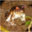

In [88]:
# Mostrar los valores de píxeles de la imagen seleccionada
una_imagen

In [89]:
# Mostrar la forma de la imagen seleccionada
una_imagen.shape

(32, 32, 3)

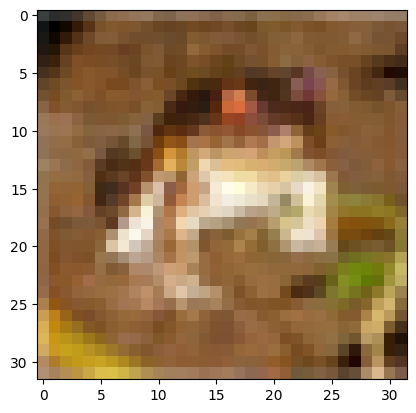

In [90]:
# Mostrar la imagen seleccionada
plt.imshow(una_imagen)

Son imágenes de 32*32, de colores por eso es el 3


### Normalizar datos:

In [91]:
# Mostrar las etiquetas de prueba
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [92]:
# Mostrar las etiquetas de entrenamiento
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [93]:
# Importar la función to_categorical para la codificación one-hot
from tensorflow.keras.utils import to_categorical

In [94]:
# Mostrar la forma de las etiquetas de entrenamiento
y_train.shape

(50000, 1)

In [95]:
# Convertir las etiquetas de prueba a formato one-hot
y_cat_test = to_categorical(y_test, 10)

In [96]:
# Convertir las etiquetas de entrenamiento a formato one-hot
y_cat_train = to_categorical(y_train, 10)

Se convierten los datos para que puedan ser usados por la CNN.

In [97]:
# Mostrar las etiquetas de prueba en formato one-hot
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [98]:
# Mostrar la forma de las etiquetas de prueba en formato one-hot
y_cat_test.shape

(10000, 10)

In [99]:
# Mostrar las etiquetas de entrenamiento en formato one-hot
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [100]:
# Mostrar la forma de las etiquetas de entrenamiento en formato one-hot
y_cat_train.shape

(50000, 10)

In [101]:
# Mostrar el valor máximo de píxel en la imagen seleccionada
una_imagen.max()

np.uint8(255)

In [102]:
# Mostrar el valor mínimo de píxel en la imagen seleccionada
una_imagen.min()

np.uint8(0)

In [103]:
# Normalizar los datos de entrenamiento y prueba dividiendo por 255
x_train = x_train / 255
x_test = x_test / 255

Normalizamos los datos dividiendo por 255, ahora los valores estarán entre 0 y 1.

In [104]:
# Mostrar los valores de píxeles de la primera imagen después de la normalización
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [105]:
# Mostrar el valor máximo de píxel en el conjunto de entrenamiento después de la normalización
x_train.max()

np.float64(1.0)

In [106]:
# Mostrar el valor mínimo de píxel en el conjunto de entrenamiento después de la normalización
x_train.min()

np.float64(0.0)

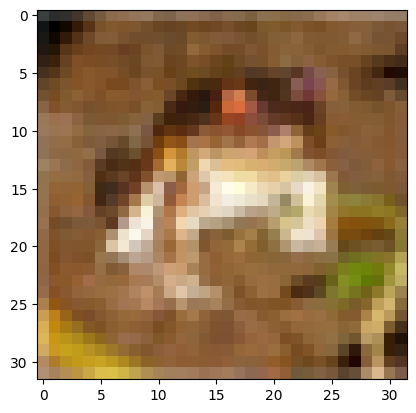

In [107]:
# Mostrar la primera imagen después de la normalización
plt.imshow(x_train[0])

La imagen sigue igual.

### Cambio del formato de datos

In [108]:
# Mostrar la forma del conjunto de entrenamiento después de la normalización
x_train.shape

(50000, 32, 32, 3)

In [109]:
# Mostrar la forma del conjunto de prueba después de la normalización
x_test.shape

(10000, 32, 32, 3)

En este caso no es necesario cambiar el formato de los datos.

## Parte 2: Modelo Base ANN

In [110]:
# Importar librerías para construir el modelo
import time
from tensorflow.keras import layers, models

### Definición del modelo ANN (Flatten -> Dense ReLU x 1-2 -> Softmax 10)


In [111]:
# Definir el modelo de Red Neuronal Artificial (ANN)
model = models.Sequential([
    # Capa de entrada con la forma de las imágenes
    layers.Input(shape=(32, 32, 3)),
    # Aplanar la imagen a un vector para la capa densa
    layers.Flatten(),
    # Primera capa densa con activación ReLU
    layers.Dense(256, activation="relu"),
    # Segunda capa densa con activación ReLU
    layers.Dense(128, activation="relu"),
    # Capa de salida con activación softmax para clasificación multiclase
    layers.Dense(10, activation="softmax")
])

Se compila el modelo:

In [112]:
# Compilar el modelo ANN
model.compile(
    loss = 'categorical_crossentropy', # Función de pérdida para clasificación multiclase one-hot
    optimizer = 'adam', # Optimizador Adam
    metrics = ['accuracy'] # Métrica de evaluación: exactitud
)

In [113]:
# Mostrar el resumen del modelo ANN
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [114]:
# Importar EarlyStopping para detener el entrenamiento anticipadamente
from tensorflow.keras.callbacks import EarlyStopping

In [115]:
# Definir la devolución de llamada EarlyStopping
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

In [116]:
# Entrenar el modelo ANN
start = time.time()
history = model.fit(
    x_train, y_cat_train, # Datos de entrenamiento
    epochs=10, # Número de épocas
    batch_size=32, # Tamaño del lote
    validation_data = (x_test,y_cat_test), # Datos de validación
    callbacks = [detencion_temprana], # Devoluciones de llamada
    verbose=2 # Mostrar información detallada durante el entrenamiento
)
elapsed = time.time() - start

Epoch 1/10
1563/1563 - 13s - 8ms/step - accuracy: 0.3279 - loss: 1.8632 - val_accuracy: 0.3710 - val_loss: 1.7304
Epoch 2/10
1563/1563 - 5s - 3ms/step - accuracy: 0.3962 - loss: 1.6842 - val_accuracy: 0.4010 - val_loss: 1.6688
Epoch 3/10
1563/1563 - 5s - 3ms/step - accuracy: 0.4216 - loss: 1.6156 - val_accuracy: 0.4204 - val_loss: 1.6211
Epoch 4/10
1563/1563 - 5s - 3ms/step - accuracy: 0.4393 - loss: 1.5658 - val_accuracy: 0.4316 - val_loss: 1.5865
Epoch 5/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4514 - loss: 1.5298 - val_accuracy: 0.4460 - val_loss: 1.5496
Epoch 6/10
1563/1563 - 5s - 3ms/step - accuracy: 0.4623 - loss: 1.5008 - val_accuracy: 0.4632 - val_loss: 1.5113
Epoch 7/10
1563/1563 - 5s - 3ms/step - accuracy: 0.4688 - loss: 1.4796 - val_accuracy: 0.4695 - val_loss: 1.4936
Epoch 8/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4749 - loss: 1.4621 - val_accuracy: 0.4677 - val_loss: 1.4920
Epoch 9/10
1563/1563 - 4s - 3ms/step - accuracy: 0.4824 - loss: 1.4439 - val_accuracy: 0.4684 -

### Evaluar modelo:

In [117]:
# Obtener y mostrar las métricas de entrenamiento y validación finales
train_acc_last = history.history["accuracy"][-1]
val_acc_last   = history.history["val_accuracy"][-1]
best_val_acc   = max(history.history["val_accuracy"])

print(f"Tiempo de entrenamiento: {elapsed:.2f} s")
print(f"Exactitud entrenamiento (última época): {train_acc_last:.4f}")
print(f"Exactitud validación (última época):    {val_acc_last:.4f}")
print(f"Mejor exactitud validación:             {best_val_acc:.4f}")

Tiempo de entrenamiento: 56.03 s
Exactitud entrenamiento (última época): 0.4861
Exactitud validación (última época):    0.4705
Mejor exactitud validación:             0.4705


In [118]:
# Crear un DataFrame con las métricas del historial de entrenamiento
metricas = pd.DataFrame(model.history.history)

In [119]:
# Mostrar las primeras filas del DataFrame de métricas
metricas.head()

,accuracy,loss,val_accuracy,val_loss
0,0.32794,1.863245,0.3710,1.730415
1,0.39618,1.684201,0.4010,1.668827
2,0.42160,1.615650,0.4204,1.621086
3,0.43926,1.565757,0.4316,1.586526
4,0.45138,1.529824,0.4460,1.549565


<Axes: >

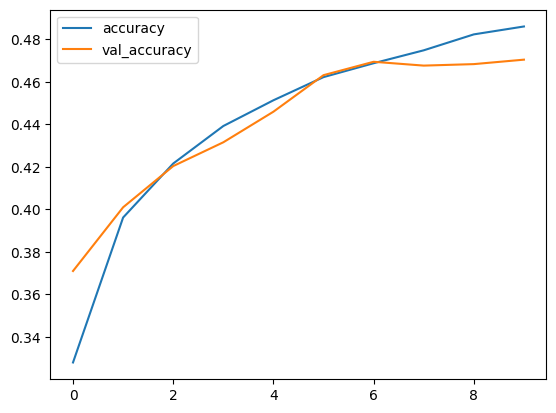

In [120]:
# Graficar la exactitud de entrenamiento y validación a lo largo de las épocas
metricas[['accuracy', 'val_accuracy']].plot()

<Axes: >

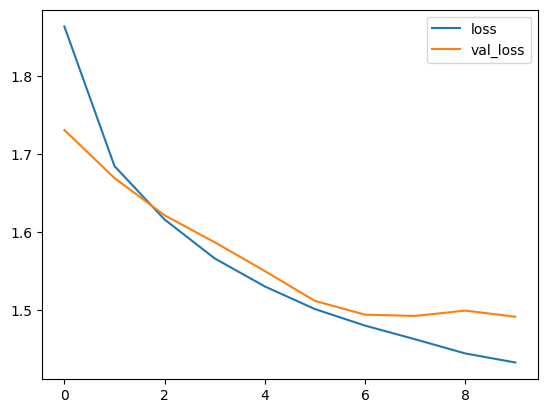

In [121]:
# Graficar la pérdida de entrenamiento y validación a lo largo de las épocas
metricas[['loss', 'val_loss']].plot()

In [122]:
# Mostrar los nombres de las métricas del modelo y evaluar el modelo en los datos de prueba
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose = 0))

['loss', 'compile_metrics']
[1.4910141229629517, 0.47049999237060547]


In [123]:
import sklearn

In [124]:
# Importar funciones para el reporte de clasificación y la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix

### Hacemos predicciones con el modelo:

In [125]:
# Hacer predicciones en los datos de prueba y obtener la clase predicha (índice con mayor probabilidad)
predicciones = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [126]:
# Mostrar la forma de las etiquetas de prueba en formato one-hot
y_cat_test.shape

(10000, 10)

In [127]:
# Mostrar la primera etiqueta de prueba en formato one-hot
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [128]:
# Mostrar la primera predicción
predicciones[0]

np.int64(5)

In [129]:
# Mostrar las etiquetas de prueba originales
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [130]:
# Imprimir el reporte de clasificación
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54      1000
           1       0.53      0.66      0.59      1000
           2       0.37      0.26      0.30      1000
           3       0.33      0.31      0.32      1000
           4       0.38      0.50      0.43      1000
           5       0.42      0.37      0.39      1000
           6       0.47      0.54      0.51      1000
           7       0.58      0.49      0.53      1000
           8       0.59      0.51      0.55      1000
           9       0.54      0.47      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



In [131]:
# Calcular y mostrar la matriz de confusión
confusion_matrix(y_test, predicciones)

array([[585,  62,  52,  29,  50,  20,  31,  21, 100,  50],
       [ 43, 664,  24,  22,  22,  17,  18,  19,  67, 104],
       [ 95,  21, 259,  84, 209,  87, 142,  66,  16,  21],
       [ 41,  33,  96, 312,  96, 185, 119,  50,  28,  40],
       [ 65,  22,  80,  52, 502,  44, 126,  69,  20,  20],
       [ 29,  22,  82, 191,  97, 373,  85,  71,  25,  25],
       [  7,  25,  45, 110, 176,  53, 540,  20,   7,  17],
       [ 42,  38,  39,  73, 138,  67,  32, 486,  16,  69],
       [203, 105,  13,  25,  24,  28,  16,  14, 511,  61],
       [ 38, 265,  13,  35,  23,  22,  28,  29,  74, 473]])

<Axes: >

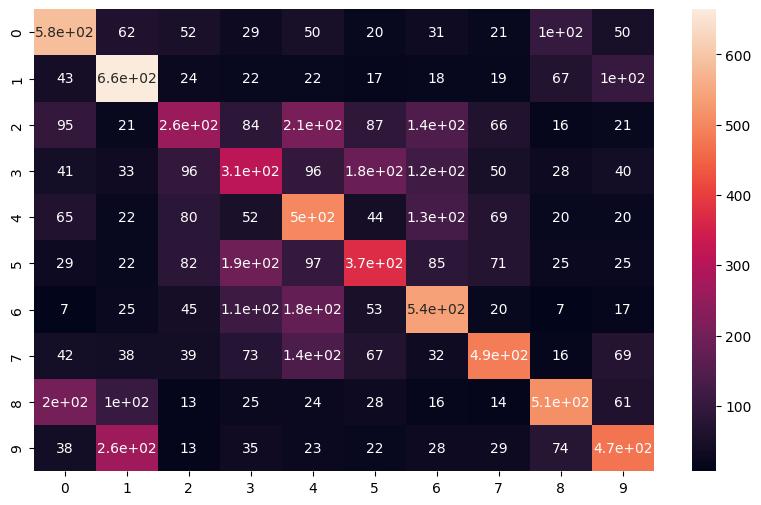

In [132]:
# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test,predicciones),annot = True)

### Prediciendo una imagen dada:

In [133]:
# Seleccionar una imagen específica del conjunto de prueba para la predicción
mi_numero = x_test[11]

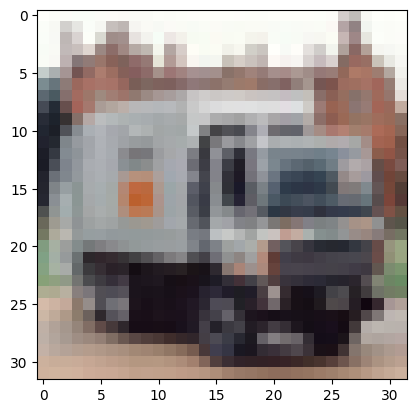

In [134]:
# Mostrar la imagen seleccionada para la predicción
plt.imshow(mi_numero)

In [135]:
# Realizar la predicción para la imagen seleccionada y mostrar la clase predicha
np.argmax(model.predict(mi_numero.reshape(1,32,32,3)), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


array([9])

Categorías del conjunto de datos:

- Aviones -> 0
- Coches -> 1
- Pájaros -> 2
- Gatos -> 3
- Ciervo -> 4
- Perros - 5
- Ranas -> 6
- Caballos -> 7
- Barcos -> 8
- Camiones -> 9

Como se puede ver acertamos en la predicción.

## Parte 3: Implementación de CNN

### Definicón del nuevo modelo:

In [136]:
# Importar librerías necesarias para el modelo CNN y configurar semillas para reproducibilidad
import os, random, time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Fijar semillas para reproducibilidad (hasta donde GPU lo permita)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Asegurar dtype y rango
x_train = x_train.astype("float32")
x_test  = x_test.astype("float32")

# Definir el número de clases y la forma de entrada
NUM_CLASSES = 10
INPUT_SHAPE = x_train.shape[1:]

In [137]:
# Definir la función para construir el modelo CNN
def build_cnn(
    input_shape=INPUT_SHAPE, # Forma de la entrada
    num_classes=NUM_CLASSES, # Número de clases de salida
    filters=(32, 64), # Número de filtros en las capas convolucionales
    dense_units=128, # Número de unidades en la capa densa
    dropout_rate=0.3, # Tasa de dropout
    use_bn=True, # Usar Batch Normalization
    l2_reg=0.0 # Regularización L2
):
    # Definir regularizador L2 si se especifica
    L2 = regularizers.l2(l2_reg) if l2_reg > 0 else None
    # Definir la capa de entrada
    inputs = keras.Input(shape=input_shape)

    x = inputs
    # Bloque 1 de capas convolucionales, Batch Normalization (opcional), ReLU, MaxPooling y Dropout
    x = layers.Conv2D(filters[0], 3, padding="same", activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters[0], 3, padding="same", activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Bloque 2 de capas convolucionales, Batch Normalization (opcional), ReLU, MaxPooling y Dropout
    x = layers.Conv2D(filters[1], 3, padding="same", activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters[1], 3, padding="same", activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Cabeza densa con Flatten, capa densa, Batch Normalization (opcional), ReLU y Dropout
    x = layers.Flatten()(x)
    x = layers.Dense(dense_units, activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Capa de salida con activación softmax
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    # Crear el modelo Keras
    model = keras.Model(inputs, outputs, name="cnn_cifar10")
    return model

In [138]:
# Importar devoluciones de llamada adicionales
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Definir la ruta para guardar el mejor modelo
ckpt_path = "cnn_best.keras"  # archivo de pesos/keras

# Definir la lista de devoluciones de llamada para el entrenamiento de la CNN
callbacks = [
    # Detención temprana basada en la exactitud de validación
    EarlyStopping(monitor="val_accuracy", patience=8, restore_best_weights=True, verbose=1),
    # Reducción de la tasa de aprendizaje basada en la pérdida de validación
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6, verbose=1),
    # Guardar el mejor modelo basado en la exactitud de validación
    ModelCheckpoint(ckpt_path, monitor="val_accuracy", save_best_only=True, verbose=1)
]

In [139]:
# Definir los parámetros base para el modelo CNN
base_params = dict(
    filters=(32, 64),
    dense_units=128,
    dropout_rate=0.35,
    use_bn=True,
    l2_reg=1e-4
)

# Construir el modelo CNN con los parámetros base
cnn_model = build_cnn(**base_params)
# Compilar el modelo CNN
cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3), # Optimizador Adam con tasa de aprendizaje
    loss="sparse_categorical_crossentropy", # Función de pérdida para clasificación multiclase con etiquetas enteras
    metrics=["accuracy"] # Métrica de evaluación: exactitud
)

# Definir el número de épocas y el tamaño del lote
EPOCHS = 40
BATCH_SIZE = 128

# Entrenar el modelo CNN y medir el tiempo de entrenamiento
t0 = time.time()
history_cnn = cnn_model.fit(
    x_train, y_train, # Datos de entrenamiento (con etiquetas enteras)
    epochs=EPOCHS, # Número de épocas
    batch_size=BATCH_SIZE, # Tamaño del lote
    validation_split=0.1, # Usar 10% de los datos de entrenamiento para validación
    callbacks=callbacks, # Devoluciones de llamada
    verbose=2 # Mostrar información detallada durante el entrenamiento
)
train_time_cnn = time.time() - t0
print(f"Train time CNN: {train_time_cnn/60:.1f} min")

Epoch 1/40

Epoch 1: val_accuracy improved from -inf to 0.26120, saving model to cnn_best.keras
352/352 - 20s - 58ms/step - accuracy: 0.4701 - loss: 1.5248 - val_accuracy: 0.2612 - val_loss: 2.3925 - learning_rate: 1.0000e-03
Epoch 2/40

Epoch 2: val_accuracy improved from 0.26120 to 0.64320, saving model to cnn_best.keras
352/352 - 9s - 24ms/step - accuracy: 0.6181 - loss: 1.1280 - val_accuracy: 0.6432 - val_loss: 1.0724 - learning_rate: 1.0000e-03
Epoch 3/40

Epoch 3: val_accuracy did not improve from 0.64320
352/352 - 5s - 13ms/step - accuracy: 0.6705 - loss: 0.9935 - val_accuracy: 0.6270 - val_loss: 1.1038 - learning_rate: 1.0000e-03
Epoch 4/40

Epoch 4: val_accuracy improved from 0.64320 to 0.68480, saving model to cnn_best.keras
352/352 - 5s - 15ms/step - accuracy: 0.7017 - loss: 0.9141 - val_accuracy: 0.6848 - val_loss: 0.9693 - learning_rate: 1.0000e-03
Epoch 5/40

Epoch 5: val_accuracy improved from 0.68480 to 0.68860, saving model to cnn_best.keras
352/352 - 5s - 14ms/step - 

In [140]:
# Definir el espacio de búsqueda de hiperparámetros para la sintonización
search_space = [
    {"lr": 1e-3, "dropout": 0.35, "batch": 128},
    {"lr": 5e-4, "dropout": 0.40, "batch": 128},
    {"lr": 1e-3, "dropout": 0.30, "batch": 64},
    {"lr": 7e-4, "dropout": 0.35, "batch": 256},
]

results = []

# Iterar sobre el espacio de búsqueda, construir, compilar y entrenar un modelo para cada configuración
for i, cfg in enumerate(search_space, 1):
    print(f"\n>>> Trial {i}/{len(search_space)} | lr={cfg['lr']} | dropout={cfg['dropout']} | batch={cfg['batch']}")
    model = build_cnn(
        filters=(32, 64),
        dense_units=128,
        dropout_rate=cfg["dropout"],
        use_bn=True,
        l2_reg=1e-4
    )
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=cfg["lr"]),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    # Entrenar el modelo con EarlyStopping y ReduceLROnPlateau
    h = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=cfg["batch"],
        validation_split=0.1,
        callbacks=[
            EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True, verbose=0),
            ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=0)
        ],
        verbose=0
    )
    # Almacenar los resultados de la mejor época
    best_val_acc = max(h.history.get("val_accuracy", [0.0]))
    best_train_acc = max(h.history.get("accuracy", [0.0]))
    results.append({**cfg, "best_val_acc": best_val_acc, "best_train_acc": best_train_acc})

# Mostrar los resultados ordenados por exactitud de validación
results_sorted = sorted(results, key=lambda d: d["best_val_acc"], reverse=True)
for r in results_sorted:
    print(r)


>>> Trial 1/4 | lr=0.001 | dropout=0.35 | batch=128

>>> Trial 2/4 | lr=0.0005 | dropout=0.4 | batch=128

>>> Trial 3/4 | lr=0.001 | dropout=0.3 | batch=64

>>> Trial 4/4 | lr=0.0007 | dropout=0.35 | batch=256
{'lr': 0.001, 'dropout': 0.3, 'batch': 64, 'best_val_acc': 0.8345999717712402, 'best_train_acc': 0.8973110914230347}
{'lr': 0.001, 'dropout': 0.35, 'batch': 128, 'best_val_acc': 0.8029999732971191, 'best_train_acc': 0.8468444347381592}
{'lr': 0.0007, 'dropout': 0.35, 'batch': 256, 'best_val_acc': 0.7990000247955322, 'best_train_acc': 0.8296444416046143}
{'lr': 0.0005, 'dropout': 0.4, 'batch': 128, 'best_val_acc': 0.7954000234603882, 'best_train_acc': 0.8085333108901978}


### Parte 4 - evaluación y compración de modelos

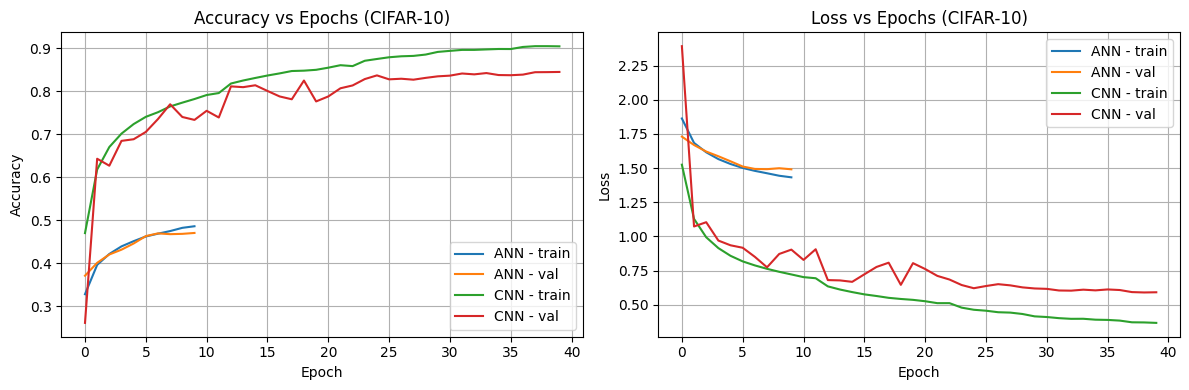

In [141]:
import matplotlib.pyplot as plt

# Función auxiliar para encontrar la clave correcta de la métrica en el historial
def _key(h, k):
    if k in h.history:
        return k
    for kk in h.history.keys():
        if k in kk:
            return kk
    return None

# Función para graficar las curvas de entrenamiento y validación de ambos modelos (ANN y CNN)
def plot_history_pair(history_ann, history_cnn, title_suffix="(CIFAR-10)"):
    # Obtener las claves de las métricas para ANN
    acc_ann      = _key(history_ann, "accuracy")
    val_acc_ann  = _key(history_ann, "val_accuracy")
    loss_ann     = _key(history_ann, "loss")
    val_loss_ann = _key(history_ann, "val_loss")

    # Obtener las claves de las métricas para CNN
    acc_cnn      = _key(history_cnn, "accuracy")
    val_acc_cnn  = _key(history_cnn, "val_accuracy")
    loss_cnn     = _key(history_cnn, "loss")
    val_loss_cnn = _key(history_cnn, "val_loss")

    plt.figure(figsize=(12,4))
    # Graficar la Exactitud
    plt.subplot(1,2,1)
    if acc_ann:     plt.plot(history_ann.history[acc_ann], label="ANN - train")
    if val_acc_ann: plt.plot(history_ann.history[val_acc_ann], label="ANN - val")
    if acc_cnn:     plt.plot(history_cnn.history[acc_cnn], label="CNN - train")
    if val_acc_cnn: plt.plot(history_cnn.history[val_acc_cnn], label="CNN - val")
    plt.title(f"Accuracy vs Epochs {title_suffix}")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.grid(True)

    # Graficar la Pérdida
    plt.subplot(1,2,2)
    if loss_ann:     plt.plot(history_ann.history[loss_ann], label="ANN - train")
    if val_loss_ann: plt.plot(history_ann.history[val_loss_ann], label="ANN - val")
    if loss_cnn:     plt.plot(history_cnn.history[loss_cnn], label="CNN - train")
    if val_loss_cnn: plt.plot(history_cnn.history[val_loss_cnn], label="CNN - val")
    plt.title(f"Loss vs Epochs {title_suffix}")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True)
    plt.tight_layout(); plt.show()

# Llamar a la función para graficar el historial de ambos modelos
plot_history_pair(history, history_cnn)

In [142]:
# Importar librerías necesarias
import numpy as np
import time
from tensorflow.keras.utils import to_categorical

# --- Asegurar que tenemos ambas variantes de y_test ---
# y_test_int: enteros (0..9)
# y_cat_test: one-hot (N, 10)
# Convertir y_test a enteros si es necesario
if 'y_test_int' not in globals():
    if y_test.ndim == 1:
        y_test_int = y_test
    else:
        y_test_int = y_test.argmax(axis=1)

# Convertir y_test a one-hot si es necesario
if 'y_cat_test' not in globals():
    if y_test.ndim == 2 and y_test.shape[-1] == 10:
        y_cat_test = y_test
    else:
        y_cat_test = to_categorical(y_test_int, 10)

# Función auxiliar para detectar si el modelo usa sparse_categorical_crossentropy
def _is_sparse_loss(model):
    """Detecta si el modelo fue compilado con sparse_categorical_crossentropy."""
    loss = model.loss
    name = loss if isinstance(loss, str) else getattr(loss, 'name', str(loss))
    return 'sparse' in name.lower()

# Función para evaluar el modelo de forma segura, usando el formato de etiqueta correcto
def evaluate_safely(model, x, y_sparse_int, y_categorical, name="Modelo"):
    """Evalúa el modelo usando el tipo de y correcto según su loss."""
    use_sparse = _is_sparse_loss(model)
    y_true = y_sparse_int if use_sparse else y_categorical
    t0 = time.time()
    # Evaluar el modelo
    test_loss, test_acc = model.evaluate(x, y_true, verbose=0)
    dt = time.time() - t0
    # Imprimir los resultados de la evaluación
    print(f"{name} [{ 'sparse' if use_sparse else 'categorical' }] → "
          f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f} | Eval time: {dt:.2f}s")
    return test_acc, test_loss

# --- Evalúa ANN y CNN de forma segura ---
acc_ann,  loss_ann  = evaluate_safely(model,      x_test, y_test_int, y_cat_test, name="ANN")
acc_cnn,  loss_cnn  = evaluate_safely(cnn_model,  x_test, y_test_int, y_cat_test, name="CNN")

ANN [sparse] → Test accuracy: 0.7885 | Test loss: 0.7012 | Eval time: 5.44s
CNN [sparse] → Test accuracy: 0.8313 | Test loss: 0.6262 | Eval time: 5.43s


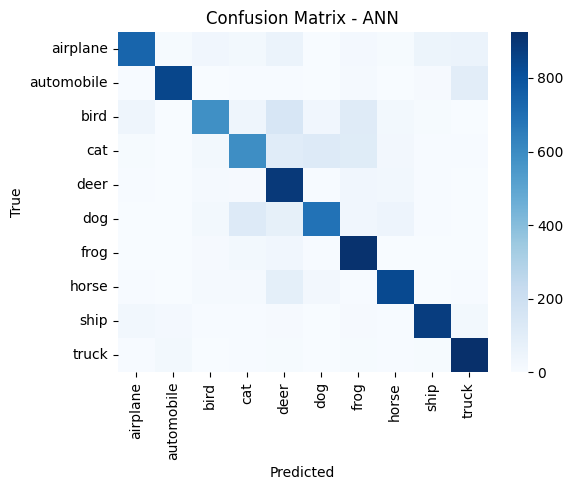

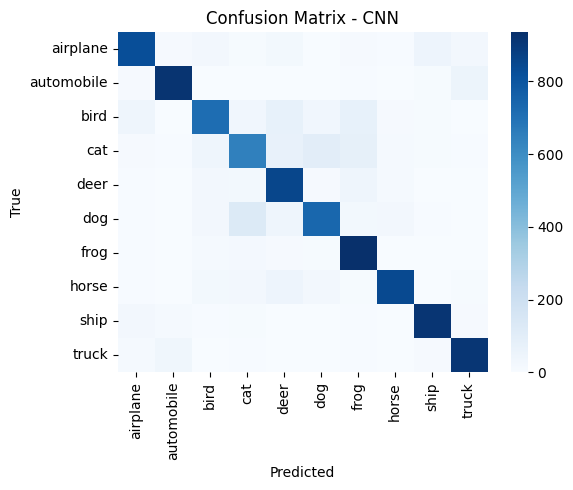

Classification Report - ANN
              precision    recall  f1-score   support

    airplane     0.8731    0.7360    0.7987      1000
  automobile     0.9349    0.8470    0.8888      1000
        bird     0.8134    0.5840    0.6799      1000
         cat     0.6995    0.5890    0.6395      1000
        deer     0.6208    0.8890    0.7311      1000
         dog     0.7710    0.6870    0.7266      1000
        frog     0.7190    0.9160    0.8056      1000
       horse     0.8436    0.8360    0.8398      1000
        ship     0.8931    0.8770    0.8850      1000
       truck     0.8243    0.9240    0.8713      1000

    accuracy                         0.7885     10000
   macro avg     0.7993    0.7885    0.7866     10000
weighted avg     0.7993    0.7885    0.7866     10000

Classification Report - CNN
              precision    recall  f1-score   support

    airplane     0.8617    0.8290    0.8451      1000
  automobile     0.9216    0.9170    0.9193      1000
        bird     0.797

In [143]:
# Importar librerías necesarias
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Nombres estándar de las clases de CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Hacer predicciones con el modelo ANN
probs_ann = model.predict(x_test, verbose=0)      # ANN entrenada con one-hot
# Hacer predicciones con el modelo CNN
probs_cnn = cnn_model.predict(x_test, verbose=0)  # CNN (sparse) igual devuelve probs
# Obtener las clases predichas para ANN
y_pred_ann = probs_ann.argmax(axis=1)
# Obtener las clases predichas para CNN
y_pred_cnn = probs_cnn.argmax(axis=1)

# Calcular la matriz de confusión para ANN y CNN
cm_ann = confusion_matrix(y_test_int, y_pred_ann)
cm_cnn = confusion_matrix(y_test_int, y_pred_cnn)

# Función para graficar la matriz de confusión
def plot_cm(cm, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted'); plt.ylabel('True'); plt.title(title)
    plt.tight_layout(); plt.show()

# Graficar las matrices de confusión para ambos modelos
plot_cm(cm_ann, "Confusion Matrix - ANN")
plot_cm(cm_cnn, "Confusion Matrix - CNN")

# Imprimir los reportes de clasificación para ambos modelos
print("Classification Report - ANN")
print(classification_report(y_test_int, y_pred_ann, target_names=class_names, digits=4))
print("Classification Report - CNN")
print(classification_report(y_test_int, y_pred_cnn, target_names=class_names, digits=4))

In [145]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Función auxiliar para convertir etiquetas a enteros 1D
def _to_1d_int(y):
    y = np.asarray(y)
    # (N,10) one-hot -> enteros
    if y.ndim == 2 and y.shape[-1] > 1:
        y = y.argmax(axis=1)
    # (N,1) -> (N,)
    if y.ndim == 2 and y.shape[-1] == 1:
        y = y.ravel()
    # asegúrate de int
    return y.astype(int)

# Función para mostrar ejemplos de imágenes mal clasificadas
def show_misclassified(x, y_true, y_pred, class_names, max_images=12, title="Misclassified examples"):
    # Convertir etiquetas a enteros 1D
    y_true_int = _to_1d_int(y_true)
    y_pred_int = _to_1d_int(y_pred)

    # Encontrar los índices de las imágenes mal clasificadas
    mis_idx = np.where(y_true_int != y_pred_int)[0]
    if mis_idx.size == 0:
        print("¡No hubo errores en el subconjunto evaluado! 🎉")
        return
    # Seleccionar aleatoriamente un subconjunto de imágenes mal clasificadas
    sel = np.random.choice(mis_idx, size=min(max_images, mis_idx.size), replace=False)

    # Configurar el diseño de la figura
    cols = 4
    rows = int(np.ceil(len(sel)/cols))
    plt.figure(figsize=(12, 3*rows))
    # Mostrar cada imagen mal clasificada con su etiqueta real y predicha
    for i, idx in enumerate(sel, 1):
        plt.subplot(rows, cols, i)
        plt.imshow(x[idx])
        plt.axis('off')
        t = class_names[int(y_true_int[idx])]
        p = class_names[int(y_pred_int[idx])]
        plt.title(f"True: {t}\nPred: {p}")
    # Añadir un título a la figura
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

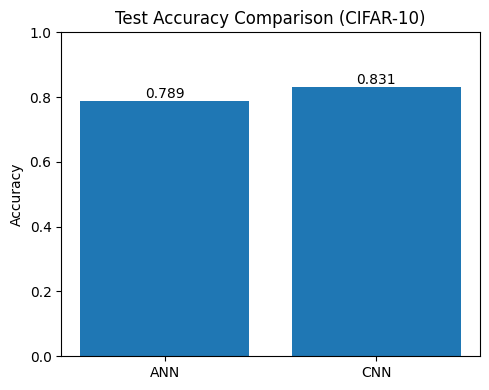

In [146]:
import matplotlib.pyplot as plt

acc_ann_f = float(acc_ann)
acc_cnn_f = float(acc_cnn)

plt.figure(figsize=(5,4))
plt.bar(["ANN","CNN"], [acc_ann_f, acc_cnn_f])
plt.title("Test Accuracy Comparison (CIFAR-10)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate([acc_ann_f, acc_cnn_f]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

## Parte 5: Reflexión Crítica

### Comparación de ANN vs CNN
Los resultados muestran una clara ventaja de la CNN frente a la ANN:

- **Exactitud en test**:  
  - ANN: ~78.9%  
  - CNN: ~83.1%  
- **Curvas de entrenamiento**:  
  La ANN alcanza un techo cercano al 60% en validación, mostrando subajuste significativo. En contraste, la CNN logra más del 80% de validación y se mantiene estable, lo que evidencia una mejor capacidad de generalización.
- **Reportes por clase**:  
  La CNN ofrece mejoras notables en clases difíciles como *bird* (+7 puntos en recall) y *cat* (+6 puntos en recall). Sin embargo, ambas arquitecturas siguen presentando confusión en categorías visualmente similares (*cat vs dog*, *truck vs automobile*).

### Rol de las capas convolucionales y de pooling
Las capas convolucionales permiten a la red aprender patrones locales como bordes, texturas y formas, lo que facilita la identificación de objetos independientemente de su posición o pequeñas variaciones. El pooling aporta **invariancia espacial** y reducción de dimensionalidad, disminuyendo el riesgo de sobreajuste y mejorando la eficiencia computacional. En contraste, la ANN trata de aprender directamente de todos los píxeles aplanados, lo que dificulta capturar estructuras espaciales en imágenes.

### Experimentos de hiperparámetros
Se exploraron configuraciones de *learning rate*, *dropout* y *batch size*. El mejor resultado se obtuvo con:
- **lr=0.001, dropout=0.3, batch=64** → `val_accuracy ≈ 83.5%`.  
Esto evidencia que un *dropout* moderado y un batch más pequeño favorecen la generalización. En cambio, tasas de dropout más altas (0.4) o batches muy grandes redujeron el rendimiento.

### Limitaciones observadas
- La CNN, aunque superior a la ANN, sigue confundiendo clases con similitudes visuales.  
- El dataset CIFAR-10 es complejo y el modelo usado, aunque decente, no alcanza el rendimiento de arquitecturas más profundas y modernas (p. ej., ResNet, VGG).  
- Se observa cierta variabilidad en la validación, indicando que aún existe espacio para mejorar regularización y estabilidad.

### Posibles mejoras
- **Data Augmentation**: aplicar transformaciones (rotación, flips, zoom) para incrementar la diversidad del entrenamiento.  
- **Batch Normalization adicional** en todas las capas convolucionales para estabilizar el gradiente.  
- **Arquitecturas más profundas** (VGG-like, ResNet) que aprovechan conexiones residuales y mayor capacidad de representación.  
- **Fine-tuning** con modelos preentrenados en datasets más grandes (ImageNet).


**Conclusión**:  
La CNN supera a la ANN en este problema porque explota la estructura espacial de las imágenes, lo que le permite generalizar mejor. Aun así, la arquitectura utilizada es relativamente sencilla y puede ser potenciada con técnicas de augmentación y arquitecturas más avanzadas.


## Ejercicio extra
Aplicamos aumentación de datos con capas de preprocesamiento de Keras (RandomFlip, RandomRotation, RandomZoom, RandomContrast) para aumentar la diversidad del set de entrenamiento. Entrenamos una CNN con augmentación y la comparamos contra la CNN base (sin augmentación) en curvas y métricas de test.




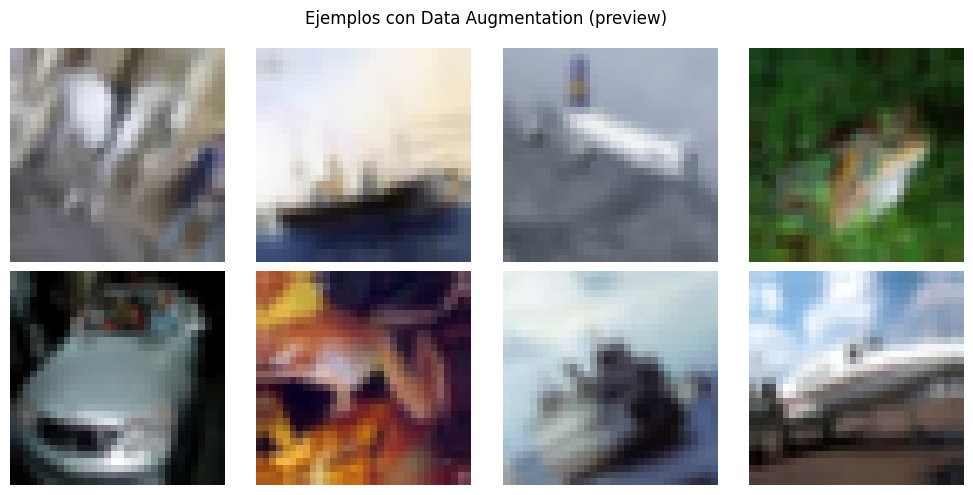

In [147]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Capas de augmentación (activas solo en entrenamiento)
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.10),
        layers.RandomZoom(0.10),
        layers.RandomContrast(0.10),
        # opcional:
        # layers.RandomTranslation(0.05, 0.05),
    ],
    name="data_augmentation"
)

# Vista previa rápida de augmentación
def preview_augmentation(x, n=8):
    idx = np.random.choice(len(x), n, replace=False)
    imgs = x[idx]
    aug = data_augmentation(imgs, training=True)  # forzamos augment para visualizar
    cols = 4
    rows = int(np.ceil(n/cols))
    plt.figure(figsize=(10, 2.5*rows))
    for i in range(n):
        plt.subplot(rows, cols, i+1)
        plt.imshow(aug[i].numpy())
        plt.axis("off")
    plt.suptitle("Ejemplos con Data Augmentation (preview)")
    plt.tight_layout(); plt.show()

preview_augmentation(x_train, n=8)

In [148]:
from tensorflow.keras import regularizers

# Usa los mismos hiperparámetros "base" que te dieron buen resultado
base_params_aug = dict(
    filters=(32, 64),
    dense_units=128,
    dropout_rate=0.35,
    use_bn=True,
    l2_reg=1e-4
)

def build_cnn_with_aug(
    input_shape=x_train.shape[1:],
    num_classes=10,
    augment_layer=data_augmentation,
    filters=(32, 64),
    dense_units=128,
    dropout_rate=0.35,
    use_bn=True,
    l2_reg=1e-4
):
    L2 = regularizers.l2(l2_reg) if l2_reg > 0 else None
    inputs = keras.Input(shape=input_shape)

    # AUGMENTACIÓN delante del modelo
    x = augment_layer(inputs)

    # Bloque 1
    x = layers.Conv2D(filters[0], 3, padding="same", activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters[0], 3, padding="same", activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Bloque 2
    x = layers.Conv2D(filters[1], 3, padding="same", activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters[1], 3, padding="same", activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Cabeza densa
    x = layers.Flatten()(x)
    x = layers.Dense(dense_units, activation=None, kernel_regularizer=L2)(x)
    if use_bn: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(dropout_rate)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="cnn_cifar10_aug")

## Entrenamiento CNN+Aug

In [149]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import time

callbacks_aug = [
    EarlyStopping(monitor="val_accuracy", patience=8, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-6, verbose=1),
    ModelCheckpoint("cnn_aug_best.keras", monitor="val_accuracy", save_best_only=True, verbose=1),
]

cnn_aug = build_cnn_with_aug(**base_params_aug)
cnn_aug.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",   # y_* en enteros
    metrics=["accuracy"]
)

EPOCHS = 40
BATCH_SIZE = 128

t0 = time.time()
history_cnn_aug = cnn_aug.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    callbacks=callbacks_aug,
    verbose=2
)
print(f"Train time CNN+Aug: {(time.time()-t0)/60:.1f} min")


Epoch 1/40

Epoch 1: val_accuracy improved from -inf to 0.28000, saving model to cnn_aug_best.keras
352/352 - 18s - 51ms/step - accuracy: 0.4166 - loss: 1.6898 - val_accuracy: 0.2800 - val_loss: 2.2223 - learning_rate: 1.0000e-03
Epoch 2/40

Epoch 2: val_accuracy improved from 0.28000 to 0.52640, saving model to cnn_aug_best.keras
352/352 - 16s - 46ms/step - accuracy: 0.5247 - loss: 1.3760 - val_accuracy: 0.5264 - val_loss: 1.4155 - learning_rate: 1.0000e-03
Epoch 3/40

Epoch 3: val_accuracy improved from 0.52640 to 0.60740, saving model to cnn_aug_best.keras
352/352 - 9s - 26ms/step - accuracy: 0.5713 - loss: 1.2572 - val_accuracy: 0.6074 - val_loss: 1.1795 - learning_rate: 1.0000e-03
Epoch 4/40

Epoch 4: val_accuracy improved from 0.60740 to 0.65720, saving model to cnn_aug_best.keras
352/352 - 10s - 29ms/step - accuracy: 0.6010 - loss: 1.1841 - val_accuracy: 0.6572 - val_loss: 1.0347 - learning_rate: 1.0000e-03
Epoch 5/40

Epoch 5: val_accuracy did not improve from 0.65720
352/352 -

In [150]:
def _is_sparse_loss(model):
    loss = model.loss
    name = loss if isinstance(loss, str) else getattr(loss, 'name', str(loss))
    return 'sparse' in name.lower()

def evaluate_safely(model, x, y_sparse_int, y_categorical, name="Modelo"):
    y_true = y_sparse_int if _is_sparse_loss(model) else y_categorical
    t0 = time.time()
    test_loss, test_acc = model.evaluate(x, y_true, verbose=0)
    dt = time.time() - t0
    print(f"{name} [{'sparse' if _is_sparse_loss(model) else 'categorical'}] → "
          f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f} | Eval: {dt:.2f}s")
    return test_acc, test_loss

# Asegurar variantes de etiquetas
from tensorflow.keras.utils import to_categorical
if 'y_test_int' not in globals():
    y_test_int = y_test if y_test.ndim == 1 else y_test.argmax(1)
if 'y_cat_test' not in globals():
    y_cat_test = y_test if (y_test.ndim == 2 and y_test.shape[-1]==10) else to_categorical(y_test_int, 10)

acc_cnn_base, loss_cnn_base = evaluate_safely(cnn_model, x_test, y_test_int, y_cat_test, name="CNN (base)")
acc_cnn_aug,  loss_cnn_aug  = evaluate_safely(cnn_aug,  x_test, y_test_int, y_cat_test, name="CNN + Aug")


CNN (base) [sparse] → Test accuracy: 0.8313 | Test loss: 0.6262 | Eval: 1.51s
CNN + Aug [sparse] → Test accuracy: 0.7637 | Test loss: 0.7540 | Eval: 1.73s


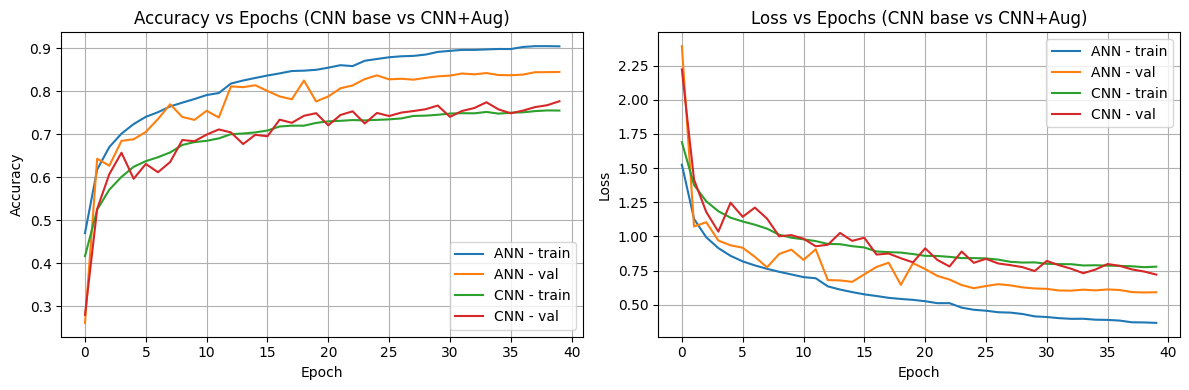

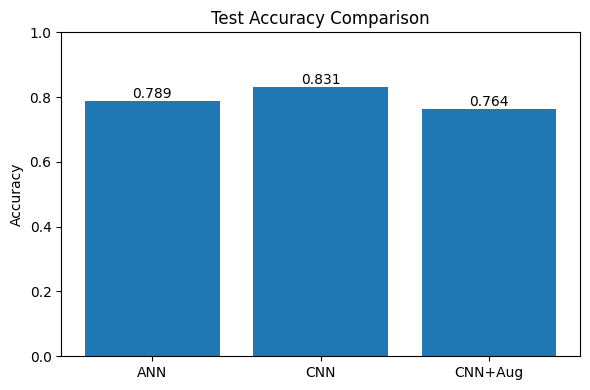

In [151]:
plot_history_pair(history_cnn, history_cnn_aug, title_suffix="(CNN base vs CNN+Aug)")

# Barra comparativa de test accuracy
acc_ann_f  = float(acc_ann)   if 'acc_ann'  in globals() else np.nan
acc_cnn_f  = float(acc_cnn)   if 'acc_cnn'  in globals() else float(acc_cnn_base)
acc_aug_f  = float(acc_cnn_aug)

labels = ["ANN","CNN","CNN+Aug"] if not np.isnan(acc_ann_f) else ["CNN","CNN+Aug"]
vals   = [acc_ann_f, acc_cnn_f, acc_aug_f] if not np.isnan(acc_ann_f) else [acc_cnn_f, acc_aug_f]

plt.figure(figsize=(6,4))
plt.bar(labels, vals)
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
for i, v in enumerate(vals):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout(); plt.show()


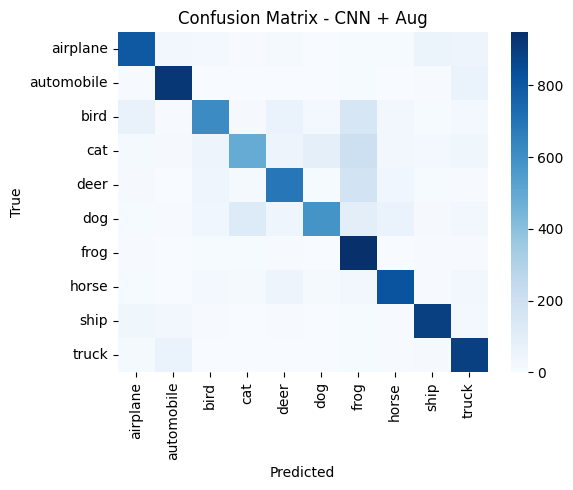

Classification Report - CNN + Aug
              precision    recall  f1-score   support

    airplane     0.8116    0.7970    0.8042      1000
  automobile     0.8597    0.9190    0.8884      1000
        bird     0.7672    0.6130    0.6815      1000
         cat     0.7141    0.4870    0.5791      1000
        deer     0.7435    0.6900    0.7158      1000
         dog     0.8086    0.5830    0.6775      1000
        frog     0.5784    0.9480    0.7185      1000
       horse     0.8226    0.8210    0.8218      1000
        ship     0.8648    0.8890    0.8767      1000
       truck     0.7712    0.8900    0.8264      1000

    accuracy                         0.7637     10000
   macro avg     0.7742    0.7637    0.7590     10000
weighted avg     0.7742    0.7637    0.7590     10000



In [152]:
# Predicciones y matriz para CNN+Aug
probs_cnn_aug = cnn_aug.predict(x_test, verbose=0)
y_pred_cnn_aug = probs_cnn_aug.argmax(axis=1)

from sklearn.metrics import confusion_matrix, classification_report
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

cm_cnn_aug = confusion_matrix(y_test_int, y_pred_cnn_aug)
plot_cm(cm_cnn_aug, "Confusion Matrix - CNN + Aug")
print("Classification Report - CNN + Aug")
print(classification_report(y_test_int, y_pred_cnn_aug, target_names=class_names, digits=4))

### Resultados observados
En la comparación de las tres arquitecturas (ANN, CNN y CNN+Aug):

- **Exactitud en test:**
  - ANN → 78.9%
  - CNN (base) → 83.1%
  - CNN + Aug → 76.4%

- **Curvas de entrenamiento:**
  - La **CNN base** muestra un buen balance entre entrenamiento y validación, alcanzando estabilidad alrededor del 80–83%.
  - La **CNN+Aug** presenta curvas más irregulares y con menor exactitud en validación, lo cual indica que la red tuvo mayor dificultad en converger hacia un buen mínimo.
  - La ANN se mantiene consistentemente por debajo de la CNN, confirmando que no logra capturar patrones espaciales de las imágenes.

### Interpretación
Aunque en la mayoría de escenarios la augmentación de datos suele mejorar la generalización, en este caso se observa un **descenso de ~7 puntos porcentuales** en exactitud de prueba al aplicar Data Augmentation. Algunas posibles causas:

1. **Sobrecarga de transformaciones**: aplicar rotación, zoom y contraste simultáneamente puede haber alterado demasiado las imágenes de CIFAR-10, generando ejemplos menos representativos.
2. **Hiperparámetros no ajustados**: el modelo con augmentación mantuvo la misma configuración de batch size, learning rate y dropout. Con augmentación suele requerirse mayor número de épocas o un *learning rate* distinto para aprovechar la variabilidad extra.
3. **Modelo relativamente poco profundo**: la arquitectura usada es sencilla (2 bloques convolucionales). Una red más profunda o con capas residuales puede aprovechar mejor la augmentación.

### Conclusión
- La CNN base fue la que **mejor rendimiento obtuvo (83.1%)**, confirmando la superioridad de las convoluciones frente a la ANN.  
- La CNN+Aug **no mejoró el desempeño** y, de hecho, obtuvo menor exactitud. Esto sugiere que la configuración de augmentación no fue la más adecuada para este modelo en particular.  
- Aun así, la augmentación redujo el sobreajuste: las curvas de validación de la CNN+Aug se mantuvieron más cercanas a las de entrenamiento, lo que indica una **mejor regularización**, aunque sacrificando exactitud.  